Instalación e importación de librerías

In [2]:
!pip install -r requirements.txt -q

## Ejercicio 1

Categorias elegidas
- Deporte
- Economía
- Salud
- Tecnología

In [2]:
from obtener_noticias import *

noticias = load_csv(resume=True)
noticias

Cargando noticias...
Noticias cargadas!
Generando resumenes...
Resumenes generados!


,url,titulo,texto,categoria,resumen
0,https://www.infobae.com//economia/2023/11/05/c...,Cuánto pagan las billeteras digitales por colo...,En octubre el Banco Central elevó la tasa míni...,economia,En octubre el Banco Central elevó la tasa míni...
1,https://www.infobae.com//economia/2023/11/05/d...,Después del balotaje arranca el sinceramiento ...,Desmontar las restricciones cambiarias llevarí...,economia,El domingo 19 a la noche el país tendrá un pre...
2,https://www.infobae.com//economia/2023/11/05/r...,Reservas en rojo: la incógnita del mercado por...,Aunque se anunció la libre disponiblidad del s...,economia,Aunque se anunció la libre disponiblidad del s...
3,https://www.infobae.com//economia/2023/11/04/s...,¿Se viene otro aumento de la carne?: la crecid...,Las lluvias recientes obligaron a los producto...,economia,Las lluvias recientes obligaron a los producto...
4,https://www.infobae.com//economia/2023/11/04/m...,"Mariana Mazzucato, la economista italoamerican...",Escribió libros sobre el rol del Estado e inte...,economia,Mariana Mazzucato es profesora del University ...
5,https://www.infobae.com//economia/2023/11/05/c...,Comienza CyberMonday 2023: cómo comprar y cuál...,Habrá más de 15.000 productos disponibles con ...,economia,Habrá más de 15.000 productos disponibles con ...
6,https://www.infobae.com//economia/2023/11/05/m...,Mudanza a un barrio privado: cuáles casas conv...,Expertos brindaron recomendaciones para elegir...,economia,Expertos brindaron recomendaciones para elegir...
7,https://www.infobae.com//economia/2023/11/05/m...,"María Castiglioni, de C&T asesores: “El próxim...",La economista analiza en una entrevista con In...,economia,La economista analiza en una entrevista con In...
8,https://www.infobae.com//economia/2023/11/05/s...,Se pueden solicitar desde este lunes: cómo ped...,Los montos y las tasas son diferentes según se...,economia,El Gobierno nacional amplió los créditos flexi...
9,https://www.infobae.com//economia/2023/11/05/l...,Las fintech crecen con productos para proteger...,Las billeteras digitales con cuentas remunerad...,economia,Las billeteras digitales con cuentas remunerad...


## Ejercicio 2

In [3]:
from Ejercicio2 import splitting, get_sp_bert_embeddings, load_bert, training, evaluation, classify_new_phrases

Obtenemos los datos para el training del dataframe

In [4]:
xtrain, xtest, ytrain, ytest = splitting(noticias)

Elegimos usar un modelo BERT pre-entrenado en español para vectorizar los títulos para tener en cuenta los contextos de las palabras a la hora de clasificar los títulos

In [5]:
load_bert()
xtrain = get_sp_bert_embeddings(xtrain)
xtest = get_sp_bert_embeddings(xtest)

Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Entrenamos el modelo de clasificación y lo evaluamos

In [6]:
modelo = training(xtrain, ytrain)
evaluation(modelo, xtest, ytest)

Precisión: 1.0
Reporte de clasificación:
               precision    recall  f1-score   support

    deportes       1.00      1.00      1.00         4
    economia       1.00      1.00      1.00         1
       salud       1.00      1.00      1.00         2
       tecno       1.00      1.00      1.00         1

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

Matriz de confusión:
[[4 0 0 0]
 [0 1 0 0]
 [0 0 2 0]
 [0 0 0 1]] 



Podemos ver que el modelo de regresión logística que obtuvimos da muy buenos resultados

In [7]:
classify_new_phrases(modelo, new_phrases = [
        "Boca pierde la final",
        "Nueva GPU en el mercado",
        "Nueva ola de Covid",
        "Massa se reúne con el presidente",
        "Clásico de Rosario",
        "Olimpiadas de invierno",
        "Dólares",
        "USD",
        "Dólares (USD)"
    ])

Clasificación predicha de 'Boca pierde la final': deportes
Clasificación predicha de 'Nueva GPU en el mercado': economia
Clasificación predicha de 'Nueva ola de Covid': economia
Clasificación predicha de 'Massa se reúne con el presidente': economia
Clasificación predicha de 'Clásico de Rosario': economia
Clasificación predicha de 'Olimpiadas de invierno': deportes
Clasificación predicha de 'Dólares': economia
Clasificación predicha de 'USD': tecno
Clasificación predicha de 'Dólares (USD)': economia


Pero cuando probamos con frases inventadas por nosotros no obtenemos muy buenos resultados. 

La tercera, quinta, y penúltimas frases son clasificadas erróneamente.

Lo del Covid y el clásico puede deberse a una falta de noticias sobre esos temas últimamente, pero como veremos en el siguiente ejercicio, las palabras "dólares" y "usd" son de las más comunes en la categoría economía y desconcierta que no pueda clasificarlas bien a menos que las pongamos una vez a cada una.

## Ejercicio 3

In [8]:
from Ejercicio3 import df2texts, texts_normalization, wordcloud, texts2freqs, top_freqs

Hacemos un diccionario con los textos de cada noticia por categoría y realizamos el proceso de normalización y limpieza del mismo

In [9]:
textos = df2texts(noticias)
textos = texts_normalization(textos)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\guido\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\guido\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Hacemos un diccionario de diccionarios de frecuencias para cada palabra, para cada categoría

In [10]:
freqs = texts2freqs(textos)

Comparamos las nubes de palabras con las 5 palabras más frecuentes (ignorando stopwords)

5 palabras más frecuentes de economia:
{'—': 42, 'argentina': 37, 'inflación': 35, 'millones': 34, 'mercado': 32}


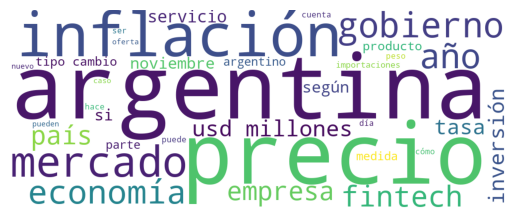

In [11]:
top_freqs(freqs, "economia")
wordcloud(textos, "economia")

5 palabras más frecuentes de tecno:
{'usuarios': 30, 'correos': 29, 'apple': 26, 'pueden': 22, 'notificaciones': 22}


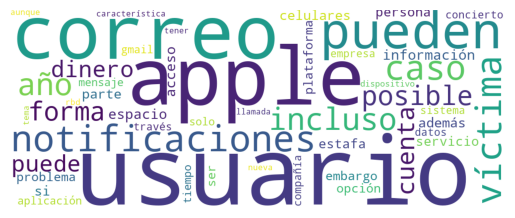

In [12]:
top_freqs(freqs, "tecno")
wordcloud(textos, "tecno")

5 palabras más frecuentes de salud:
{'salud': 55, 'puede': 51, 'suelo': 41, 'personas': 38, 'pélvico': 32}


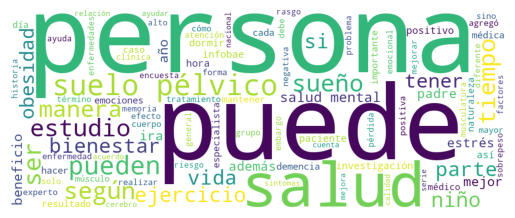

In [13]:
top_freqs(freqs, "salud")
wordcloud(textos, "salud")

5 palabras más frecuentes de deportes:
{'copa': 43, '1': 37, 'boca': 26, 'final': 23, 'libertadores': 23}


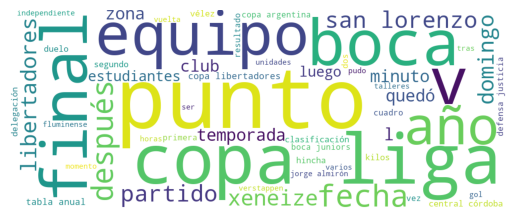

In [14]:
top_freqs(freqs, "deportes")
wordcloud(textos, "deportes")

Podemos ver que ambas funciones nos dicen información similar de cada categoría, aunque el algoritmo de las wordcloud es más complejo, y tiene en cuenta también el largo de las palabras a la hora de darles un tamaño, favoreciendo a veces las más cortas

## Ejercicio 4

In [15]:
from Ejercicio4 import leer_filtrar, heatmap_sim, pca_2d, pca_3d

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\guido\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\guido\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
categoria_analizar = "economia"

In [17]:
#traemos los titulos filtrados y no filtrados
title_no_filtrado, title_filtrado = leer_filtrar(categoria_analizar, noticias)

Vamos a analizar la relación/similitud entre los títulos de una categoría específica.

Para esto realizamos graficos de correlación y aplicamos PCA para observar en 2 y 3 dimensiones la distancias entre los títulos.

Este proceso lo realizaremos con los titulos procesados, eliminándoles puntuaciones y stopwords, y los títulos sin procesamiento anterior para observar diferencias.

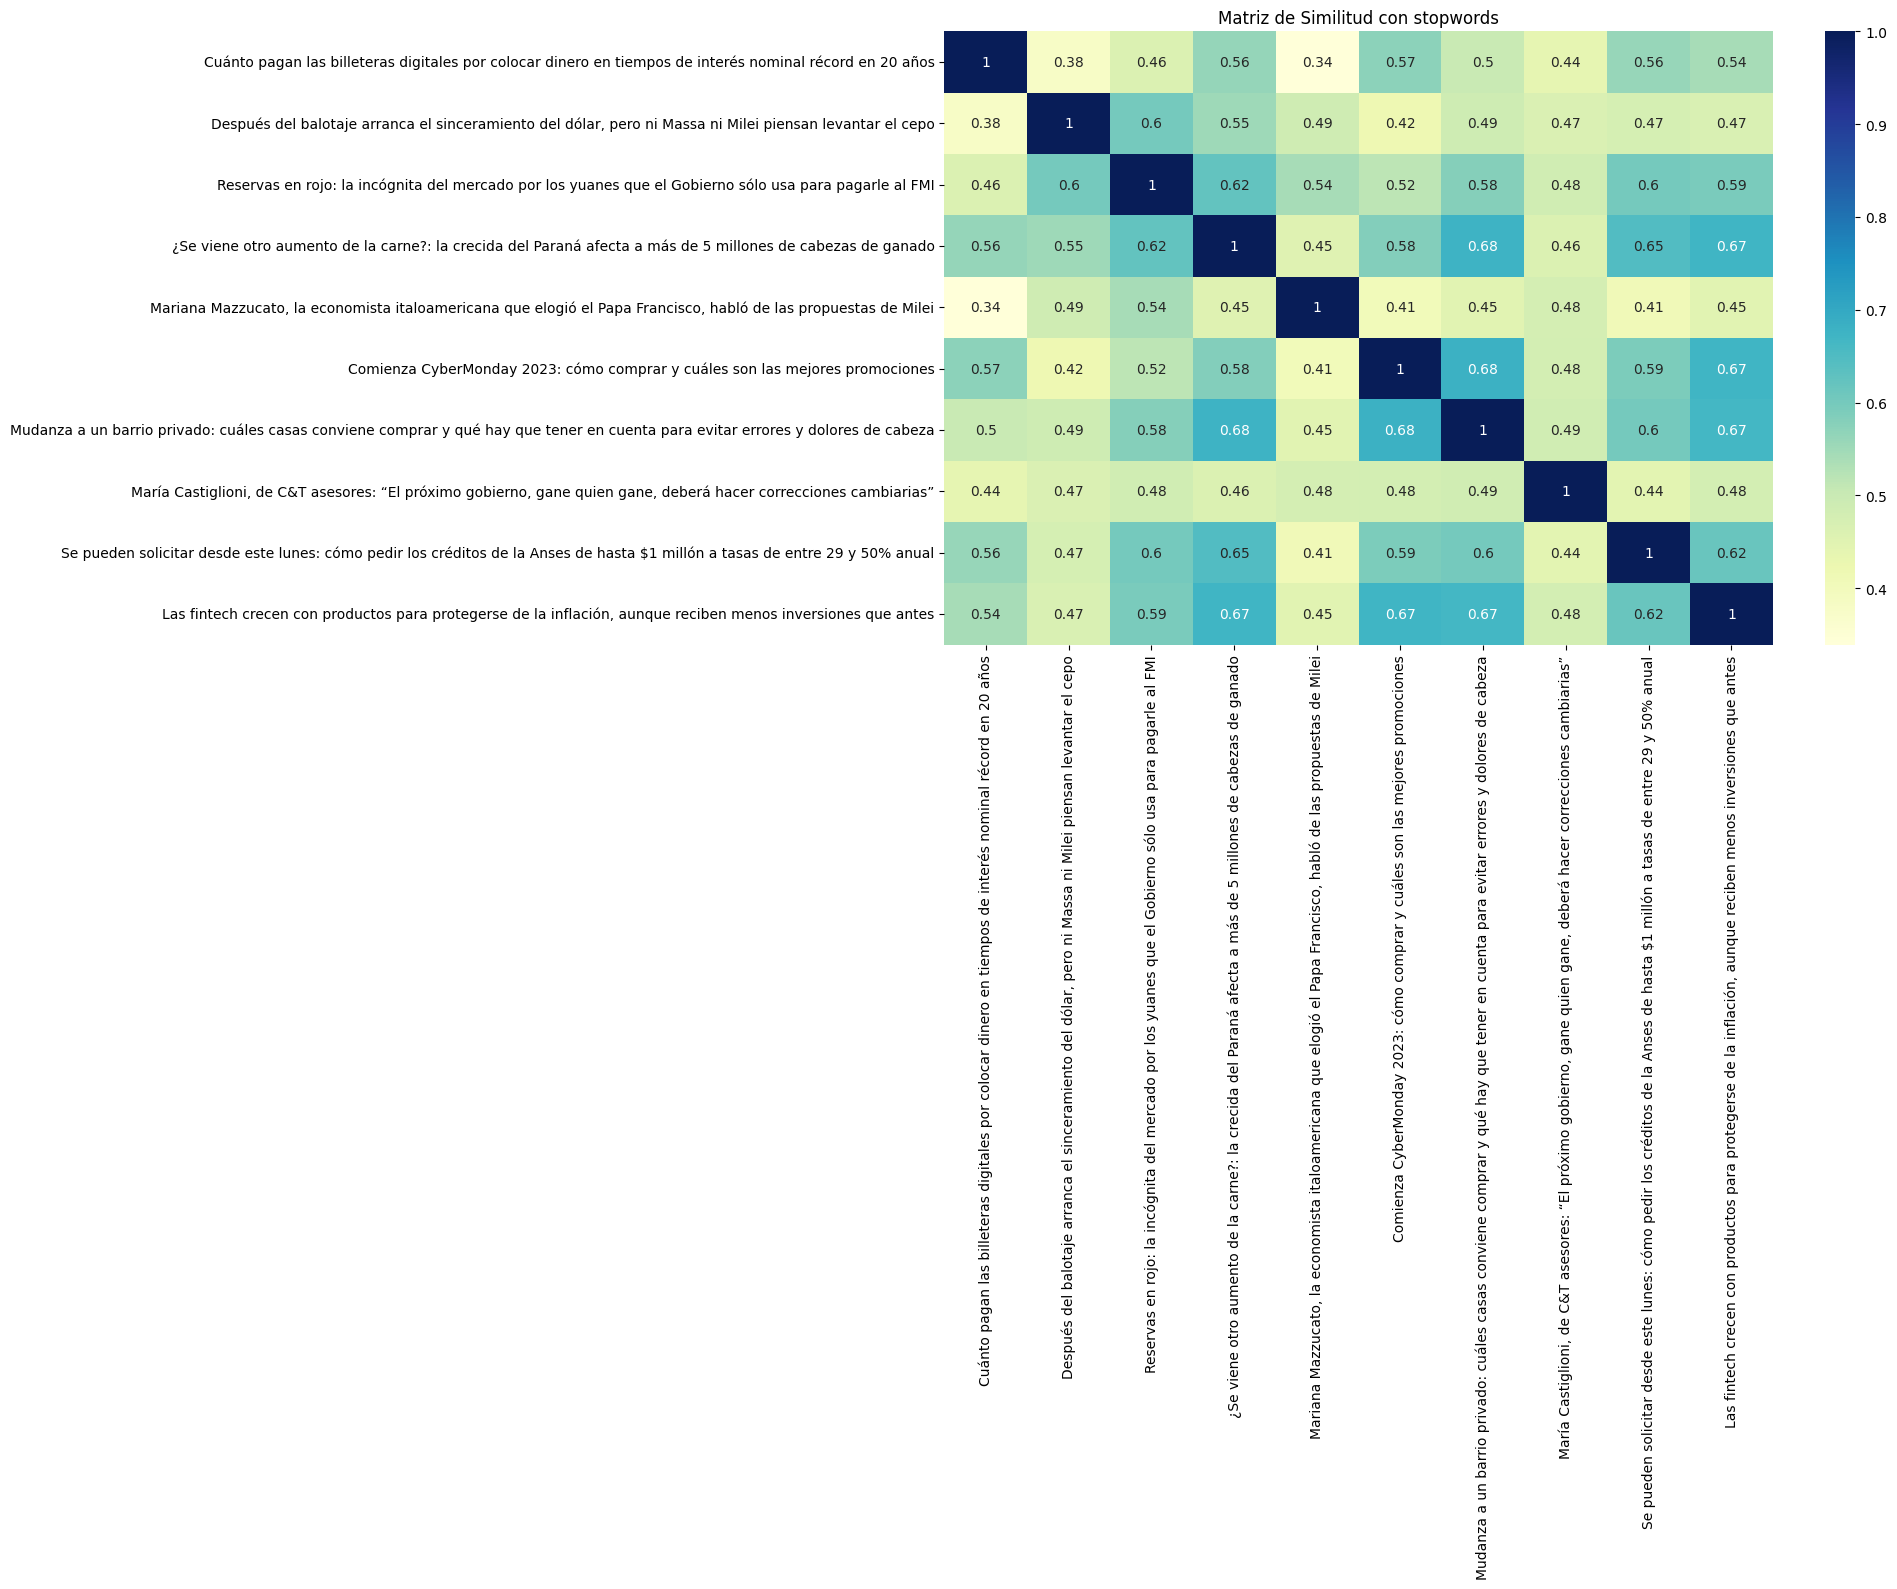

In [18]:
heatmap_sim(title_no_filtrado, "Matriz de Similitud con stopwords")

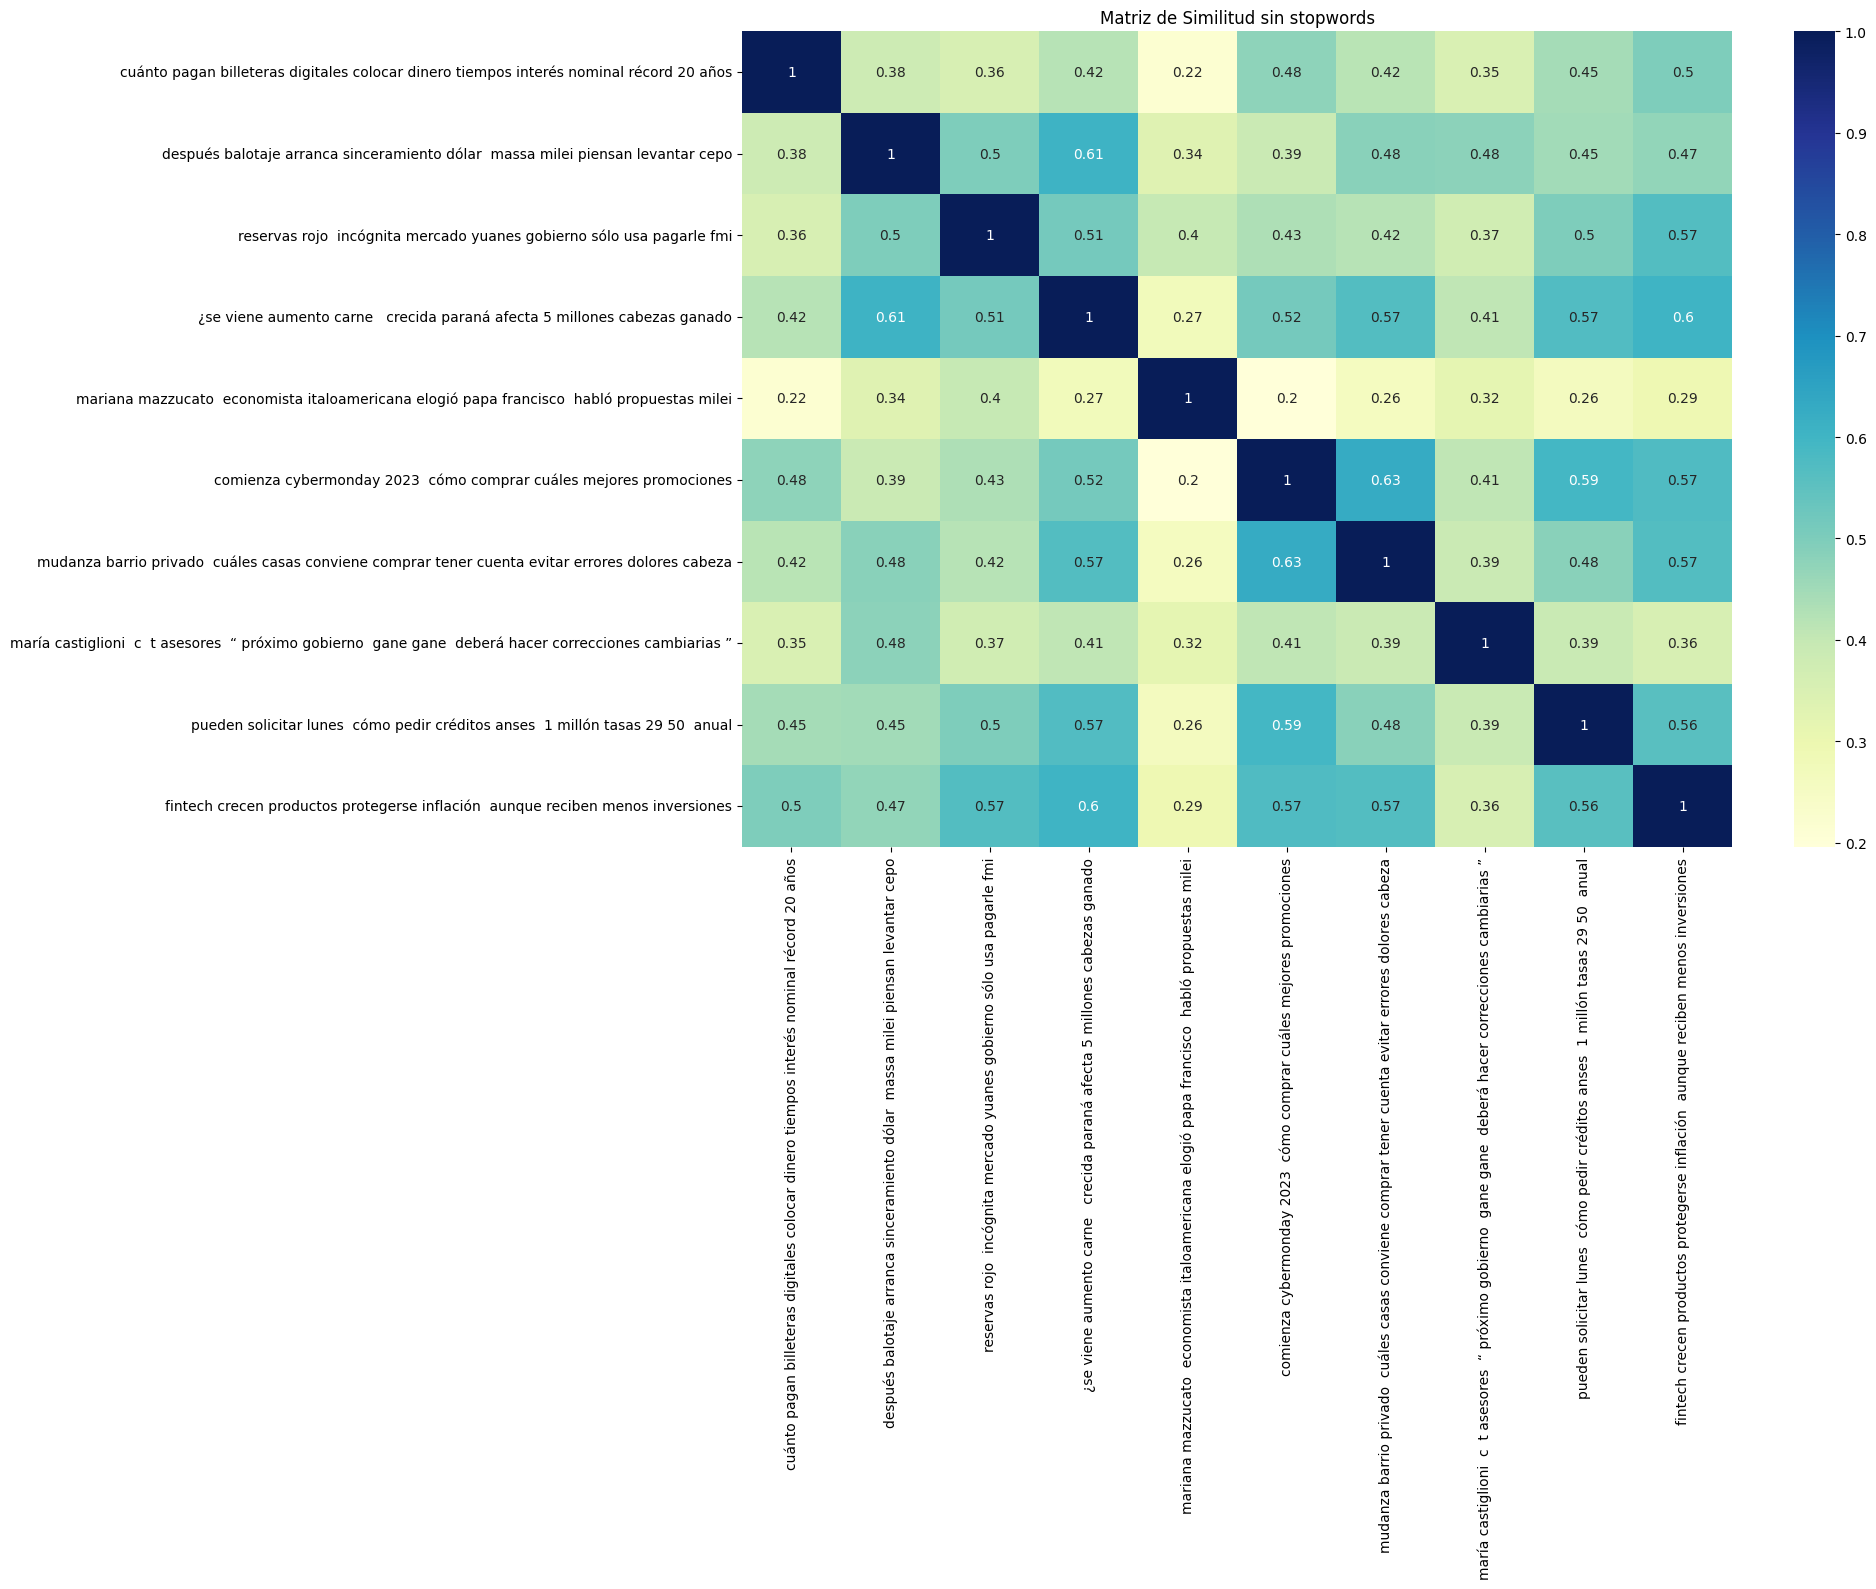

In [19]:
heatmap_sim(title_filtrado, "Matriz de Similitud sin stopwords")

Análisis dimensional utilizando PCA para reducir las dimensiones y poder visualizar gráficos

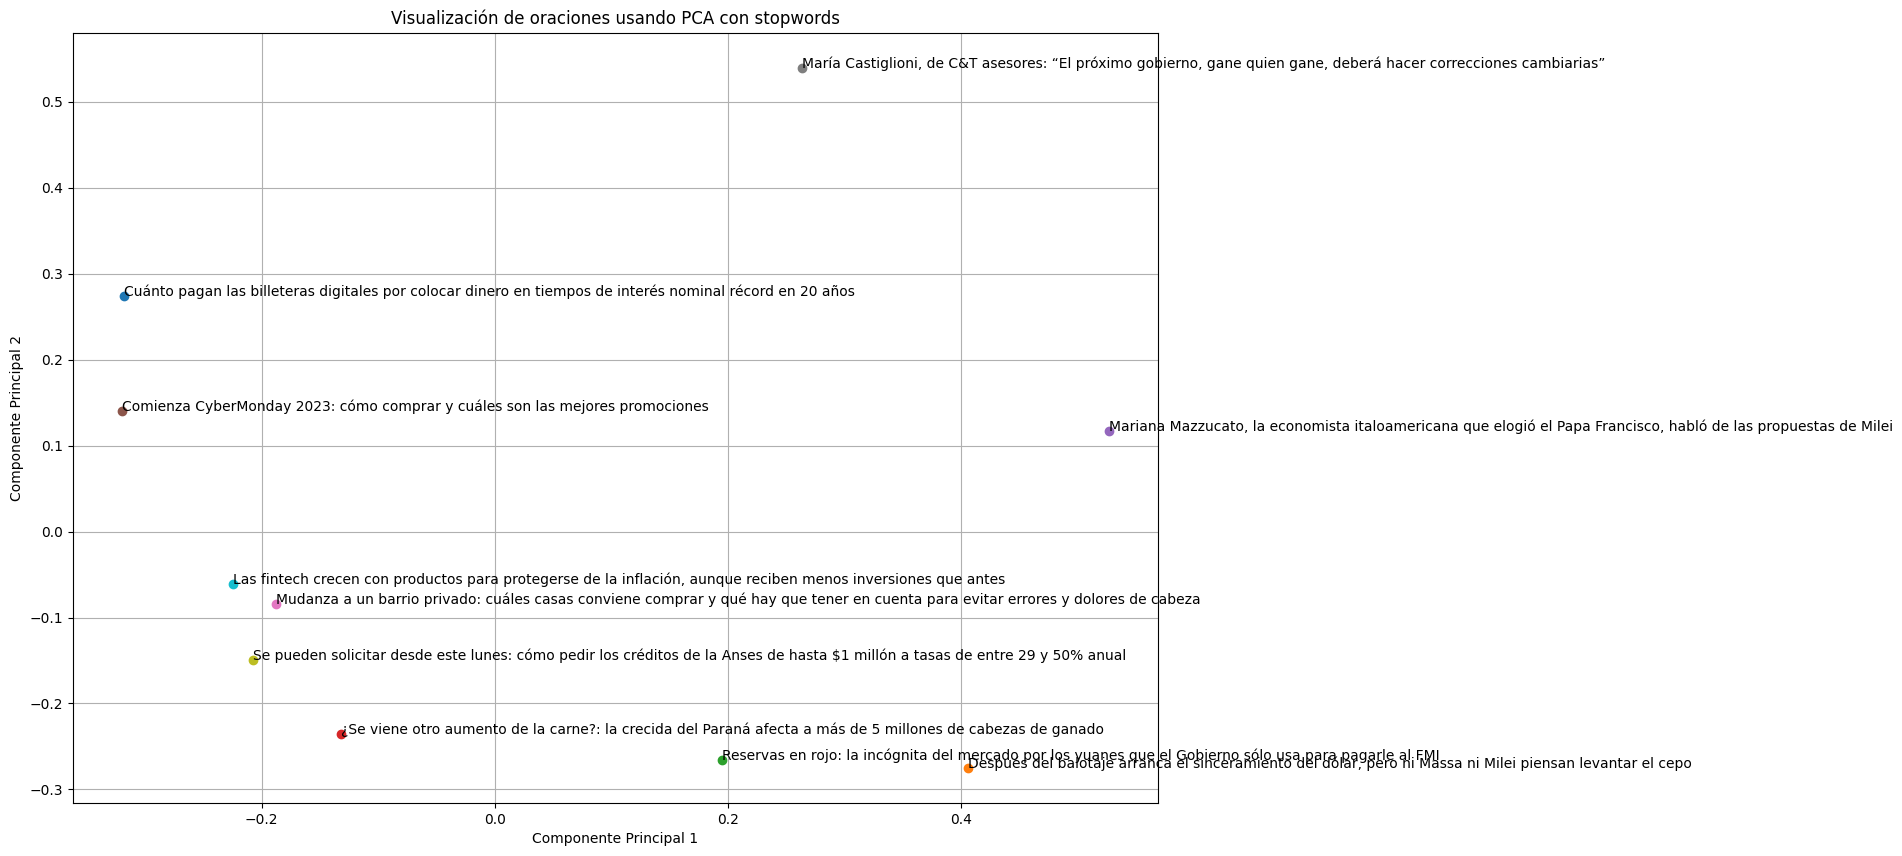

In [20]:
pca_2d(title_no_filtrado, 'Visualización de oraciones usando PCA con stopwords')

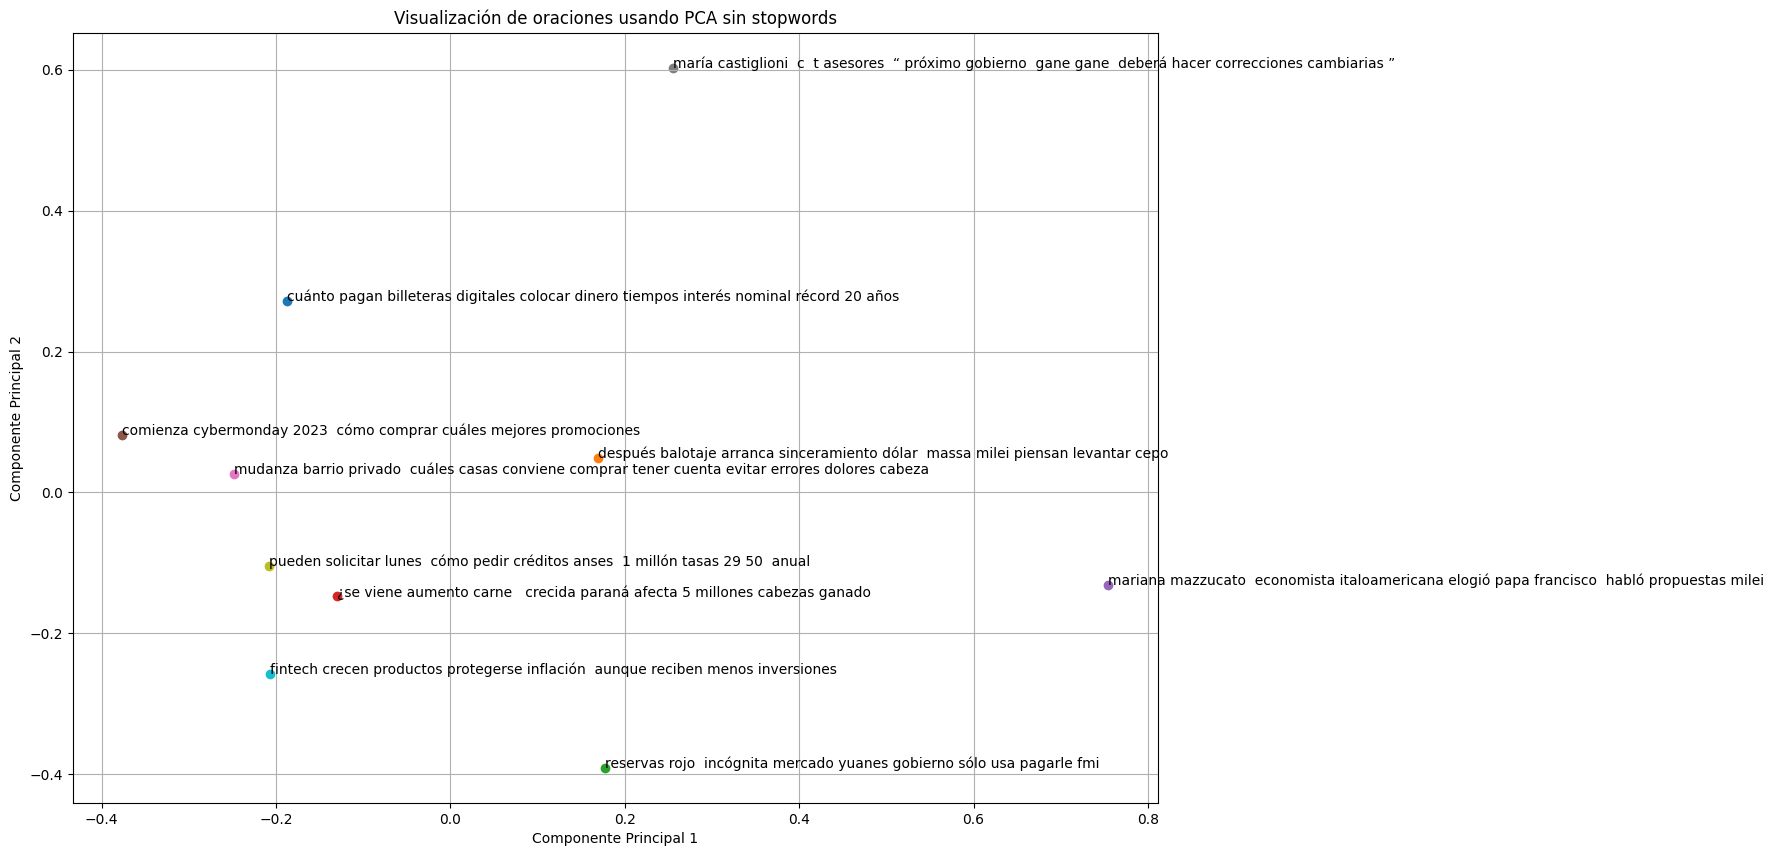

In [21]:
pca_2d(title_filtrado, 'Visualización de oraciones usando PCA sin stopwords')

In [22]:
pca_3d(title_no_filtrado, "Visualización en 3D con PCA c/stopwords")

In [23]:
pca_3d(title_filtrado, "Visualización en 3D con PCA s/stopwords")

El principal problema que observamos, ya que los resultados no son los mejores que podríamos obtener, se da por la reducida cantidad de datos que tenemos en nuestro modelo.

Podríamos obtener más noticias por categoría, obteniendo un corpus de títulos mayor, para poder realizar un modelo más completo y óptimo.

Otra limitación que pensamos es en las limitaciones semánticas de este modelo, ya que dos títulos podrían ser similares a nivel de palabras u oraciones pero tener matices diferentes. Por lo tanto, la similitud calculada por los modelos de embedding es una medida semántica, pero no necesariamente una medida de relevancia o equivalencia en sentido estricto.

Los modelos de embedding pueden tener dificultades para capturar similitud en títulos que contienen palabras poco comunes o jerga específica de una industria o campo. Estas palabras pueden no estar bien representadas en el corpus de entrenamiento.

## Ejercicio 5

Para correr el bot debe ejecutarse el script "Ejercicio5.py" dado que no funciona en un entorno de jupyter notebook. La configuración del script esta diseñada para usar la GPU en caso de estar disponible, de no haberla se ejecturará igual pero los tiempos de carga podrían ser significativamente mayores. El script cuenta con las siguientes funciones:

**Importación de bibliotecas:** El bot utiliza las bibliotecas `telebot` y `aiogram` para interactuar con la API de Telegram y recibir y responder a mensajes. También se importa la función `obtener_precio_dolar` para obtener la cotización del dólar y las funciones relacionadas con la obtención y resumen de noticias.

**Configuración del token de Telegram:** El bot configura su token de Telegram para autenticarse en la plataforma.

**Configuración de bot y dispatcher:** Se crea una instancia del bot de Telegram y se establece el dispatcher (manejador de eventos) para gestionar los mensajes entrantes y comandos.

**Creación de botones en línea:** Se crean botones en línea para permitir al usuario seleccionar categorías de noticias y resúmenes diarios.

**Manejadores de comandos:** El código define varios manejadores de comandos que responden a comandos enviados por los usuarios a través de Telegram. Por ejemplo:

- `/start` y `/help` proporcionan un mensaje de bienvenida y describen los comandos disponibles.
- `/dolar` muestra la cotización del dólar del día.
- `/resume` se utiliza para proporcionar un resumen de una noticia dada su URL.
- `/noticias` y `/hoy` muestran las opciones de categorías de noticias y resúmenes diarios, respectivamente.

**Callback Query Handler:** Maneja las selecciones de categorías de noticias y resúmenes diarios cuando el usuario hace clic en los botones en línea. Dependiendo de la selección, se recuperan y envían noticias o resúmenes relacionados.

**Configuración de registro (log):** Se configura el registro de eventos para el bot.

**Carga de datos:** El bot carga datos relacionados con noticias desde una fuente externa (posiblemente un archivo CSV) en un DataFrame global llamado `today_news`. Esto permite que el bot proporcione noticias y resúmenes de manera eficiente.

**Inicio del bot:** Finalmente, el bot se inicia y comienza a "escuchar" eventos entrantes de Telegram, como mensajes y selecciones de botones en línea. El bot se ejecutará en bucle hasta que se detenga manualmente.



El bot utiliza las funciones existentes en el script `obtener_noticias`, el cual está conformado de la siguiente manera:

**Importación de bibliotecas:** El script importa varias bibliotecas necesarias para diversas tareas, como la obtención de datos de la web, el procesamiento de texto y la generación de resúmenes de noticias. Algunas de las bibliotecas utilizadas incluyen `requests`, `pandas`, `BeautifulSoup`, `torch` y `transformers`.

**Función `scrap_page(categoria)`:** Esta función se encarga de rastrear una página web específica (en este caso, del sitio web "infobae.com") y extraer enlaces a noticias de una categoría particular. Utiliza la biblioteca `BeautifulSoup` para analizar el contenido HTML de la página y luego recopila los enlaces relevantes.

**Función `scrap_new(response)`:** Esta función toma una respuesta HTTP como entrada y extrae el título y el texto de una noticia de la página web utilizando `BeautifulSoup`.

**Función `generate_summaries(article_texts, max_length, num_beams, length_penalty, batch_size)`:** Esta función genera resúmenes de noticias a partir de textos de artículos. Utiliza el modelo pre-entrenado BART (BartForConditionalGeneration) de la biblioteca `transformers`. La función divide los textos en lotes, tokeniza y genera resúmenes por lotes y luego decodifica los resúmenes en texto legible.

**Función `generate_category_summary(df, category, max_length, num_beams, length_penalty)`:** Esta función genera un resumen completo de noticias para una categoría específica a partir de un DataFrame que contiene noticias y resúmenes. Utiliza el modelo BART para generar el resumen y luego combina los resúmenes individuales en un resumen completo (originalmente se planteo obtener resúmenes de las categorías a partir de los resúmenes de cada noticias en particular, esta idea luego fue descartada debido a que los resultados obtenidos no fueron satisfactorios, finalmente el resumen de cada categoría son los resúmenes de todas las noticias en un mismo mensaje).

**Función `obtener_precio_dolar()`:** Esta función obtiene la cotización del dólar del día consultando una página web (en este caso, "infobae.com"). Utiliza BeautifulSoup para analizar la página y extraer los precios del dólar tanto del Banco Nación como del mercado libre.

**Función `load_csv()`:** Esta función carga noticias desde diferentes categorías utilizando la función `scrap_page`. Luego, procesa y genera resúmenes para las noticias y las almacena en un DataFrame de Pandas. Finalmente, guarda los datos en un archivo CSV llamado "noticias.csv" y devuelve el DataFrame.

Para usar el bot, luego de correr el script se debe buscar en Telegram el usuario `@infobaearg_bot` y escribirle `/start` para comenzar a interactuar con él. Los comandos programados se mostrarán en el chat, así como sus respectivas explicaciones y resultados. Es importante aclarar que el bot puede empezar a utilizarse casi instantáneamente después de correr el script, dado que la carga de datos funciona en paralelo. Sin embargo, podría dar errores si se intenta obtener los resúmenes de noticias antes de que se hayan terminado de cargar los datos.
